In [2]:
#Import packages
from datascience import *
import matplotlib.pyplot as plt
%matplotlib inline 

import numpy as np
import pandas as pd
from matplotlib import patches

# An intro to Environmental Economics in Data Science

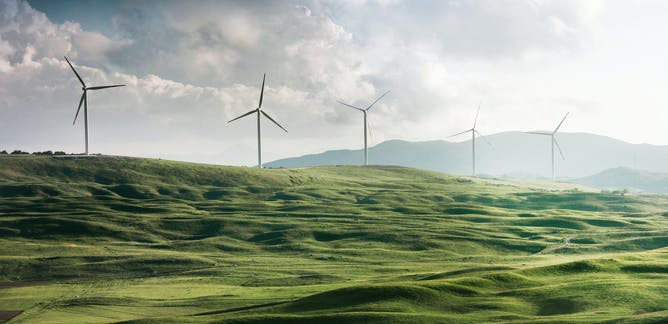

## Learning objectives

* An introductory understanding of what the field of Environmental Economics is and what it aims to accomplish.
* A thorough understanding of The McKinsey Greenhouse Gas (GHG) Abatement Cost Curve and its data science application.
* A familiarity the MAC curve's limitations and the concept of Capital Intensity
* An understanding of the important difference between static and dynamic cost assessments in choosing the most suistable abatement strategies.
* An understanding of the Environmental Kuznets Curve Hypothesis and its data science applications

## What is Environmental Economics?

In a broad sense, the field of Environmental Economics aims to relate and apply economic concepts (many of whom you're familiar with already) with the environment.

Central to Environmental Economics is the claim that the usage or degration these resources in the environment, our "environmental amenities", have an intrinsic value to humans that goes unaccounted for in the current market model. These unaccounted costs are considered market failures (italize) and carry negative externalities (italize). One such example of a negative externality is the emission of greenhouse gases (carbon dioxide, methane, nitrous oxide) from the combustion of hydrocarbons (gasoline, diesel, oil). The true cost (italize) is not reflected in the lower price one pays at the gas station. Consequently, the equilibrium quantity is higher than the socially optimal quanity (italize). As environmental economics, we're thus faced with the question: How could we reduce the quantity to the social optimum and weight in the costs and benefits of such a reduction? This is often a truly tricky question to answer!

As a result, a major proportion of research and work within the field is devoted to building tools to reveal, address, and evaluate economic policies aimed at internalizing (italize) these externalities. Very often, these tools are applied by a government which interferes with the market to a varying degress. We thus divide the environmental economic policies into two subfields:

* Prescriptive (bold): When the government to manually control a negative externality, e.g letting each emitter in the market emit a fixed amount of GHG gases. (Better example, anyone?) 

* Market-based (bold): Where the government sets an emission goal, then introduces incentives or subsidies to alter market behaviour. It is left to each market actor to decide how much to emit. A carbon tax and a cap-and-trade (carbon quoatas) are examples of marked-based interventions.

One of these tools is The McKinsey Greenhouse Gas (GHG) Abatement Cost Curve which aims to reveal the cost of abating (removing) greenhouse gases from the atmosphere in using various strategies. It stems from the McKinsey 2009 "Pathways to a Low Carbon Economy" and is a splendid example of the applications of Environmental Economics in Data Science. In the textbook, we'll walk through the concepts of it, and well'll make an attempt at building one of our own! Furthermore, we'll the Environmental Kuznets Curve Hypothesis through data, and look at reasons why it might be both wrong and right!

As you read through this, remember: This is just the tip of the iceberg in the applications of data science in environmental economics, and there is much more to explore if you chose to follow this exciting path!

## The McKinsey abatement cost curve (MAC)

The McKinsey Abatement Cost Curve gives policy makers, environmental economists, future entrepreneurs, and the curious, environmentally-minded individual an opportunity to differentiate the costs of the multiple approaches we have in reducing our carbon (CO2) emissions. It tells us where we get the best "bang for the buck" when our goal is to abate carbon. The Abatement Potential (GtCO2 per year) follows the x-axis, and the Abatement Cost (€ per ton of CO2) lies on the y-axis. Each rectangle represents a specific technology or policy (e.g switch to LED lights or install Carbon Capture Systems (CCS) in older coal plants). The wider the rectangle, the larger the abatement potential, and the taller the rectangle, the higher abatement cost for that specific intervention.

Below you'll find the most common MAC's out there, with a industry wide scope. For our own MAC plot, we chose to narrow it down to different methane gas abatement techniques.

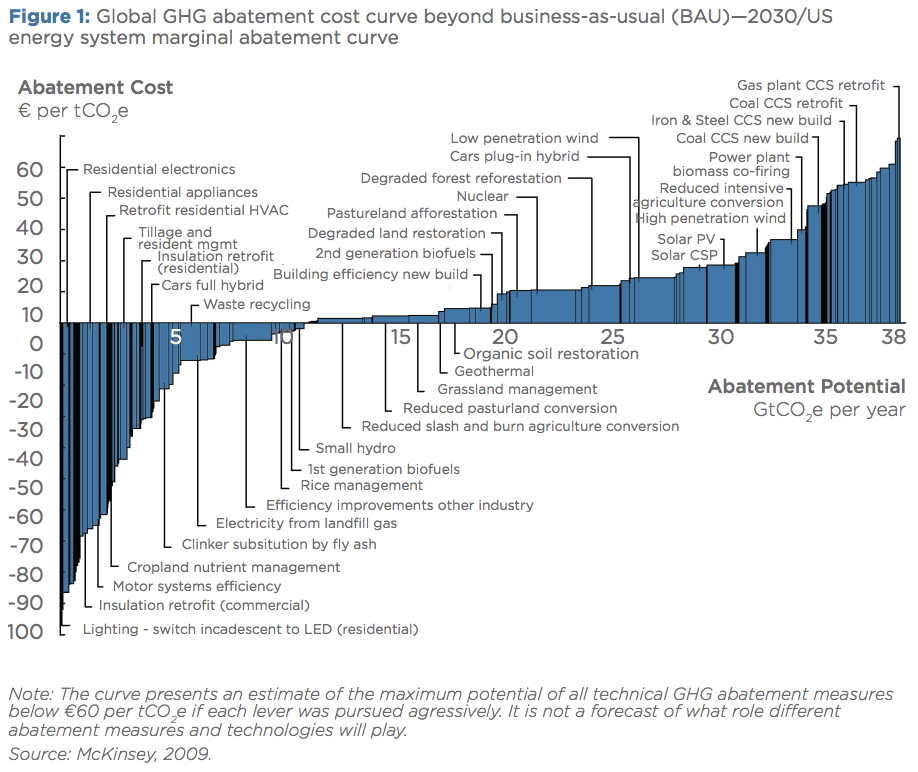

### Now, let's build one of our own! 

We start by importing a dataset on methane abatement from the International Environmental Agency (IEA): 

In [3]:
#Create abatement_data table and set upper bound of abatement potential to 200
abatement_table = Table.read_table("abatement_data.csv").where('Cost',are.between(-10.1,10)).where('Possible Savings', are.below(200)).drop('Emissions').relabel('Possible Savings', 'Abatement Potential').relabel('Cost','Abatement Cost')
abatement_table

Country,Region,Oil Gas,Production source,Upstream Downstream,Reason,Abatement technology,Abatement Potential,Abatement Cost
Japan,Asia Pacific,Gas,Onshore conventional gas,Upstream,Vented,Replace pumps,0.25,-6.2
Japan,Asia Pacific,Oil,Onshore conventional oil,Upstream,Vented,Blowdown capture,0,-6.18
Japan,Asia Pacific,Gas,Offshore gas,Upstream,Vented,Replace with instrument air systems,0.02,-5.84
Japan,Asia Pacific,Oil,Offshore oil,Upstream,Vented,Replace with instrument air systems,0.01,-5.84
Japan,Asia Pacific,Gas,Downstream gas,Downstream,Vented,Replace with instrument air systems,0.62,-5.84
Japan,Asia Pacific,Oil,Offshore oil,Upstream,Vented,Replace compressor seal or rod,0,-5.58
Japan,Asia Pacific,Gas,Offshore gas,Upstream,Vented,Replace compressor seal or rod,0,-5.58
Japan,Asia Pacific,Gas,Onshore conventional gas,Upstream,Vented,Blowdown capture,0.59,-5.57
India,Asia Pacific,Gas,Offshore gas,Upstream,Vented,Replace with instrument air systems,2.75,-5.33
India,Asia Pacific,Gas,Downstream gas,Downstream,Vented,Replace with instrument air systems,0.91,-5.33


In [4]:
#Select specific region (1/4 of data)
selection = 'Asia Pacific'
Group = abatement_table.where('Region', selection)
Group

Country,Region,Oil Gas,Production source,Upstream Downstream,Reason,Abatement technology,Abatement Potential,Abatement Cost
Japan,Asia Pacific,Gas,Onshore conventional gas,Upstream,Vented,Replace pumps,0.25,-6.2
Japan,Asia Pacific,Oil,Onshore conventional oil,Upstream,Vented,Blowdown capture,0,-6.18
Japan,Asia Pacific,Gas,Offshore gas,Upstream,Vented,Replace with instrument air systems,0.02,-5.84
Japan,Asia Pacific,Oil,Offshore oil,Upstream,Vented,Replace with instrument air systems,0.01,-5.84
Japan,Asia Pacific,Gas,Downstream gas,Downstream,Vented,Replace with instrument air systems,0.62,-5.84
Japan,Asia Pacific,Oil,Offshore oil,Upstream,Vented,Replace compressor seal or rod,0,-5.58
Japan,Asia Pacific,Gas,Offshore gas,Upstream,Vented,Replace compressor seal or rod,0,-5.58
Japan,Asia Pacific,Gas,Onshore conventional gas,Upstream,Vented,Blowdown capture,0.59,-5.57
India,Asia Pacific,Gas,Offshore gas,Upstream,Vented,Replace with instrument air systems,2.75,-5.33
India,Asia Pacific,Gas,Downstream gas,Downstream,Vented,Replace with instrument air systems,0.91,-5.33


In [5]:
#The find_x_pos function used for plotting! (out of scope)

def find_x_pos(widths):
    cumulative_widths = [0]
    cumulative_widths.extend(np.cumsum(widths))
    half_widths = [i/2 for i in widths]
    x_pos = []
    for i in range(0, len(half_widths)):
        x_pos.append(half_widths[i] + cumulative_widths[i])
    return x_pos

In [6]:
#Prepare the data for plotting
width_group = Group.column('Abatement Potential')
height_group = Group.column('Abatement Cost')
new_x_group = find_x_pos(width_group)

In [7]:
#The methane_tax function -- Let's introduce a tax!
def methane_tax(tax, table):
    if tax < min(table.column('Abatement Cost')):
        print("No Abatement")
    else:
        abatement = table.where('Abatement Cost', are.below_or_equal_to(tax))
        total_abatement = sum(abatement.column('Abatement Potential'))
        abatement_technologies = abatement.column('Abatement technology')
        print('Methane tax: ', tax)
        print('Total Abatement: ', total_abatement)
        print("")
        print("Abatement Technologies", abatement_technologies)

Methane: $4
Methane tax:  4
Total Abatement:  4579.399996707216

Abatement Technologies ['Replace pumps' 'Blowdown capture' 'Replace with instrument air systems'
 ... 'Downstream LDAR' 'Replace with electric motor'
 'Replace with electric motor']


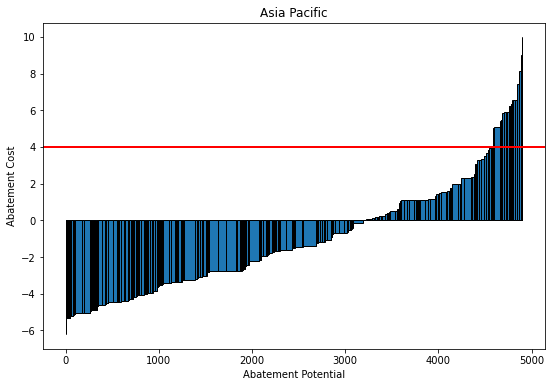

In [8]:
#The group_plot function used for plotting (out of scope)
def group_plot(tax):
    print(f"Methane: ${tax}")
    methane_tax(tax, Group)
    plt.figure(figsize=(9,6))
    plt.bar(new_x_group, height_group,width=width_group,edgecolor = 'black')
    plt.title(selection)
    plt.xlabel('Abatement Potential')
    plt.ylabel('Abatement Cost')
    plt.axhline(y=tax, color='r',linewidth = 2)
    
group_plot(4)

In [9]:
#Prepare data for plotting (second round)
width = abatement_table.column('Abatement Potential')
height = abatement_table.column('Abatement Cost')
new_x = find_x_pos(width)

In [10]:
#Let's give each type of technology a different color!
abatement_colors_dict = {}
count = 0
colors = ['#EC5F67', '#F29056', '#F9C863', '#99C794', '#5FB3B3', '#6699CC', '#C594C5','#85E827','#F165FD','#1F9F7F','#945CF8','#ff3a1d','#2a8506']
for i in set(abatement_table['Abatement technology']):
    abatement_colors_dict[i] = colors[count]
    count += 1

colors_mapped = list(pd.Series(abatement_table['Abatement technology']).map(abatement_colors_dict))
abatement_table = abatement_table.with_column('Color', colors_mapped)

Methane Tax: $3
Methane tax:  3
Total Abatement:  19371.639972971752

Abatement Technologies ['Replace pumps' 'Blowdown capture' 'Replace with instrument air systems'
 ... 'Install flares' 'Install flares' 'Replace with electric motor']


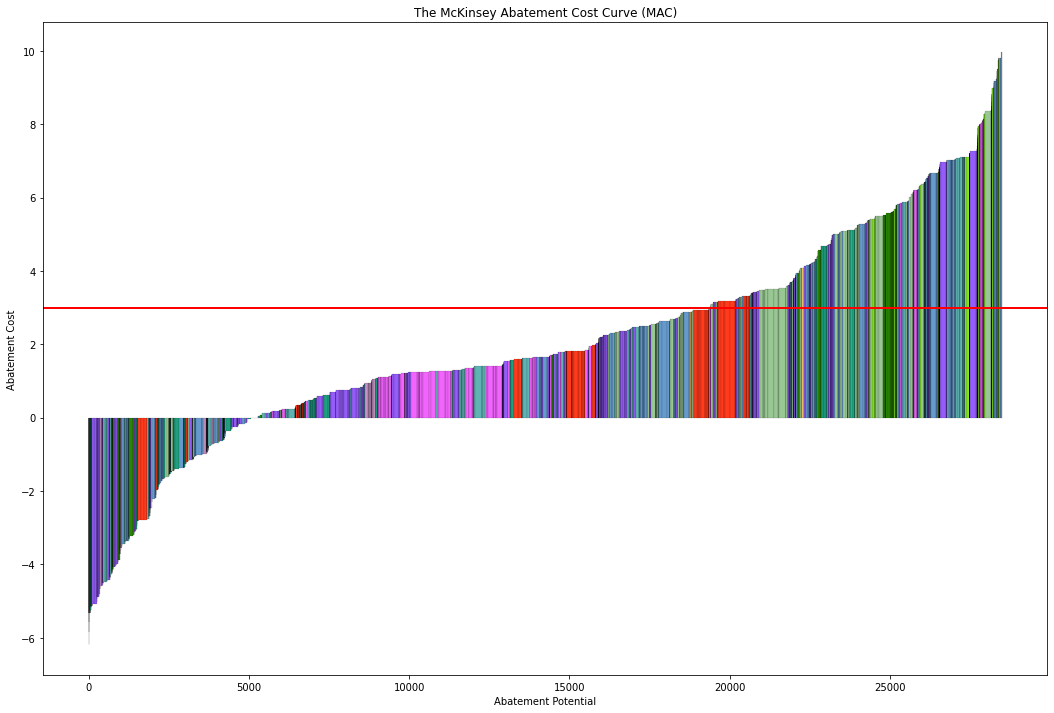

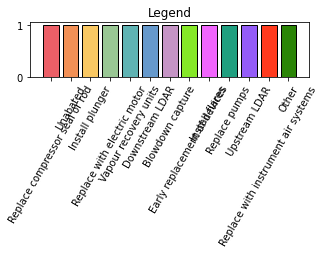

In [11]:
#The McKinsey curve plot - function!
def mckinsey_curve(tax):
    print(f"Methane Tax: ${tax}")
    methane_tax(tax, abatement_table)
    plt.figure(figsize=(18,12))
    plt.bar(new_x, height, width=width, linewidth=0.1, color=abatement_table['Color'], edgecolor = "black")
    plt.title('The McKinsey Abatement Cost Curve (MAC)')
    plt.xlabel('Abatement Potential')
    plt.ylabel('Abatement Cost')
    plt.axhline(y=tax, color='r', linewidth = 2)

    plt.figure(figsize=(5,1))
    plt.bar(abatement_colors_dict.keys(), 1, color = abatement_colors_dict.values())
    plt.xticks(rotation=60)
    plt.title('Legend')
    
mckinsey_curve(3)

### Now, let's extend the applicability of the MAC: Introducting Capital Intensity

From the MAC curve for CO2 (see figure 1), we are interested in finding capital intensity of an intervention. This is different from the Abatement Cost (bold), as it does not take potential savings from e.g lower energy consumption in the future into its calculation. However, it's a great measurement for which technologies require the highest upfront capital investment to abate an amount GHG.

The formula is as follows: 

The additional upfront investment for new technology relative to the Business as Usual (BAU) alternative / total amount of savings over the lifetime for the new technology. Here's an example:

Let's say you buy a Tesla model 3 (EV) instead of a Mercedes S-Class (ICE), then the capital intensity for that car investment is as follows:

56.000USD (Model 3) - 40.000USD (Mercedes S-Class) / (0.26kg/km - 0.092kg/km) * 200.000km (lifetime driving) = 0.635US / kg CO2 (write in latex)

 Had we re-arranged the MAC curve from figure 1 for capital intensity, it would have looked like this:

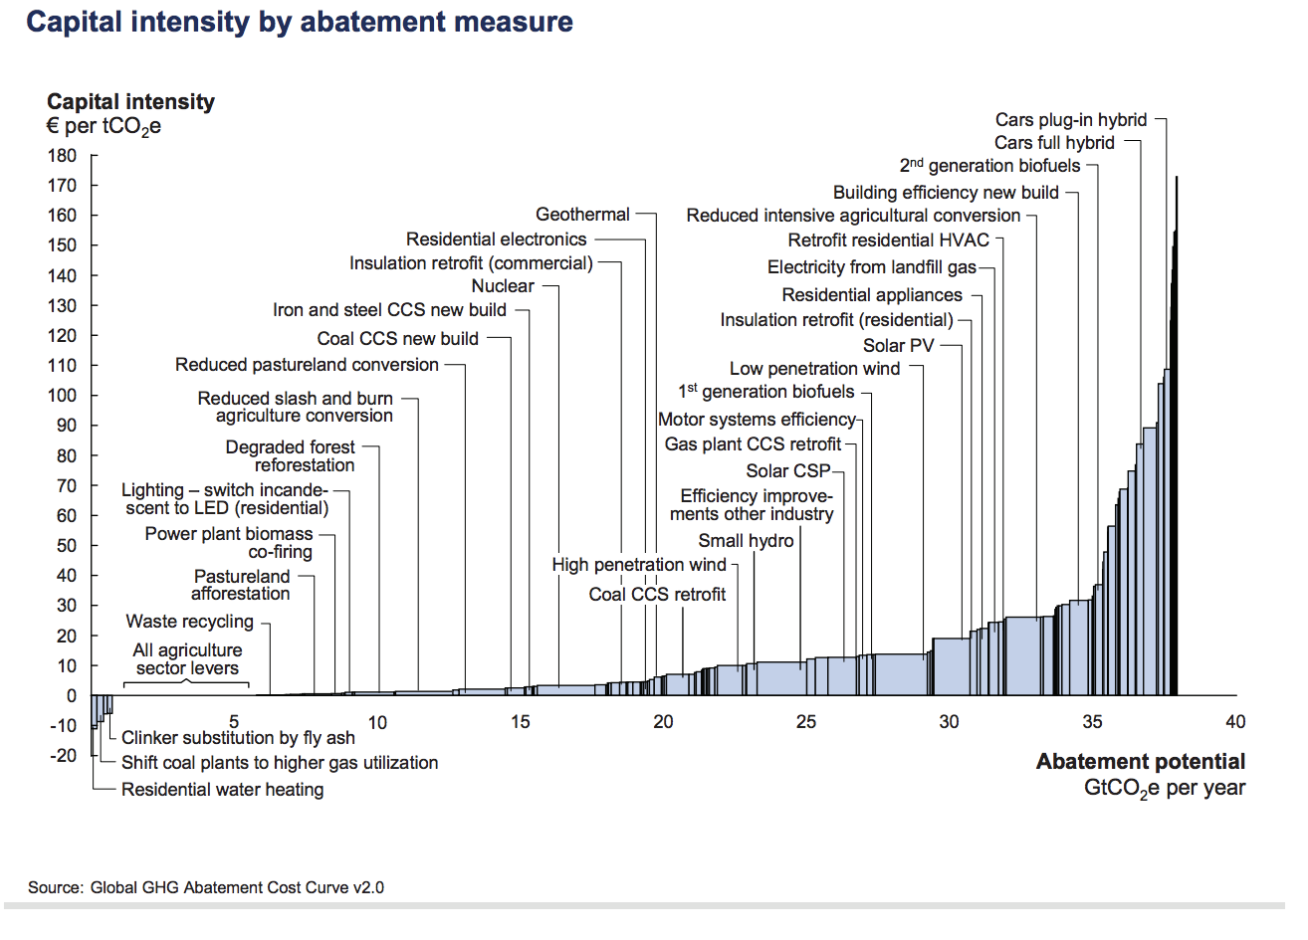

Before moving on to the next topic of this chapter, we ought to consider the drawbacks of our newfound knowledge:

## The MAC curve's important limitations and how to solve them

The most crucial limitations of the MAC curve is its inability to consider dynamic costs. In 2009, when the MAC was first created, it only considered Static Costs. Let's define them:
#### Static Costs
* The fixed costs of a new intervention, unchanged over a lifetime of an investment. Think of it as the costs you observe from this current point of view in time and expect to pay years ahead. E.g 1983 Solar Energy Price at 9USD/MW

#### Dynamic Costs
* Cost considering potential cost-reduction from increased efficiency, learning-by-doing, and other positive spillovers. E.g the actual cost of Solar Energy in 2015 at below 1USD/MW.


As a result of this shortcoming, the MAC curve tends to underestimate costs and do not fully represent the required investments within the energy transition (Kesicki and Edwins, 2012; Vogt-Schilb et al., 2015). It is not hard to understand that people were sceptical of investing in solar energy when the static costs were that high! A current example of this is the Carbon Capture & Storage (CCS) intervention: With high static costs, it might look like an unfavourable investment. How would it look like if we took dynamic costs into our calculations? 

As future data scientists, we have a responsibility to improve the MAC curve, and use our skills in prediction and anlysis to assess dynamic costs in GHG abatement with higher certainty.

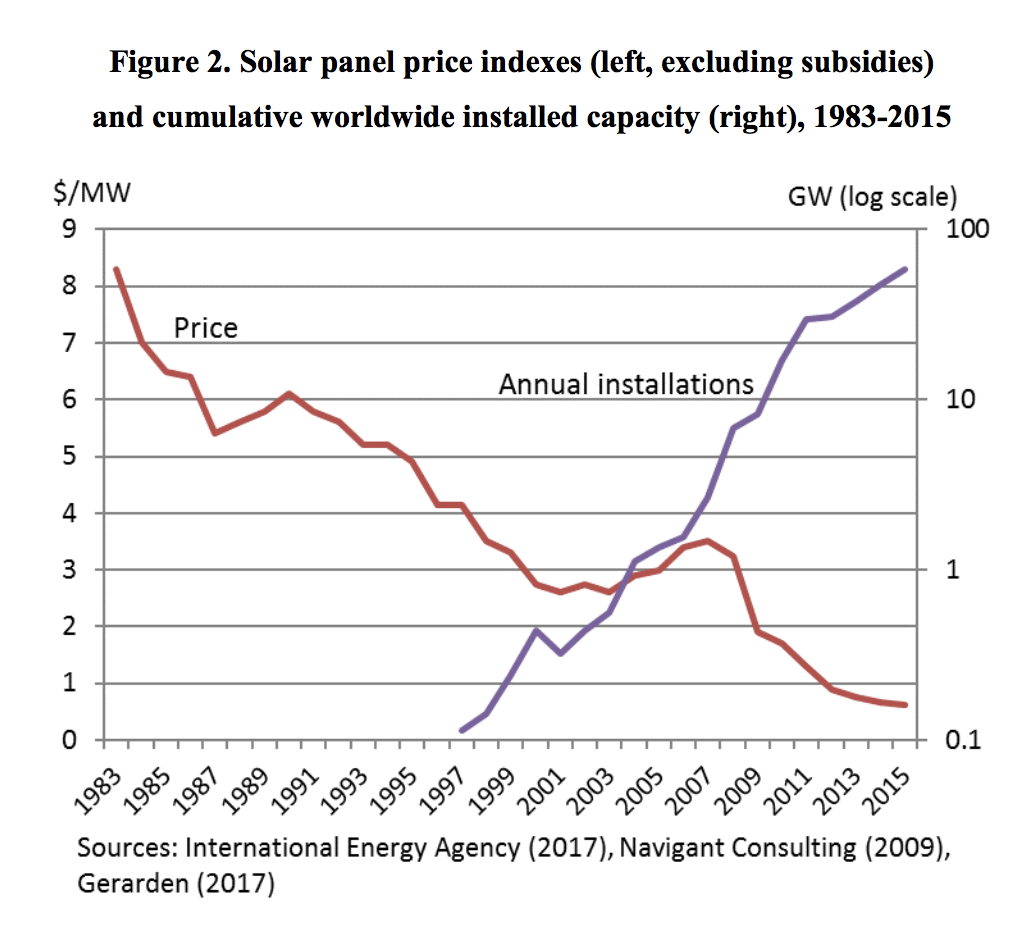

# The Environmental Kuznets Curve

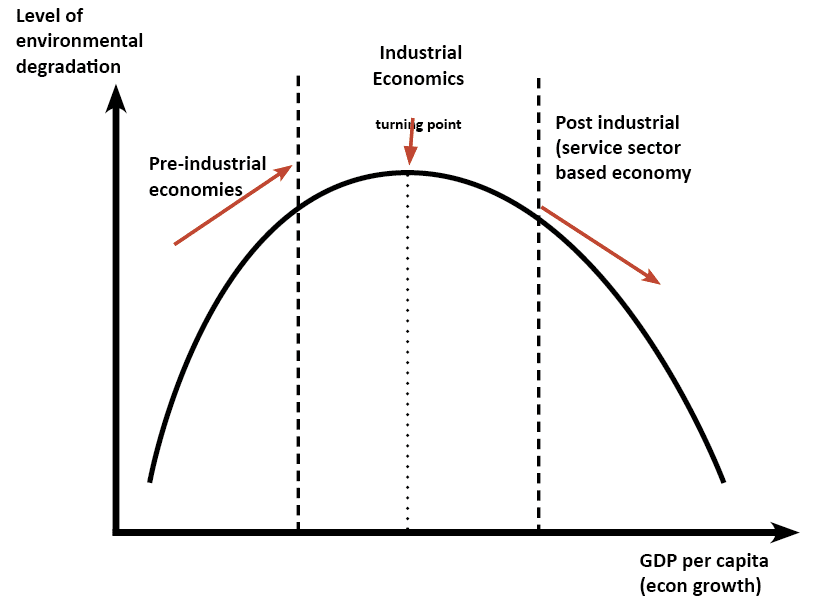

### What is the Environmental Kuznets Curve Hypothesis?

The Environmental Kuznets curve hypothesises that the economic development of a nation (in GDP per capita) is associated with a downward-facing U-shape in terms of the level of environmnetal degradation (e.g pollution, water quality, deforestation). Today, we'll look for an association between the amount of CO2 emitted per capita (t/CO2) and the growing GDP per capita (USD). This dataset is collected from Our World in Data, a great source of all sorts of data types!

In [12]:
#Importing packages
from datascience import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import patches
%matplotlib inline

#Import data and create table
co2_table = Table.read_table('co2-emissions-vs-gdp.csv').drop('145446-annotations','Total population (Gapminder, HYDE & UN)','Code')
co2_table

Entity,Year,Per capita CO2 emissions,GDP per capita,Continent
Abkhazia,2015,nan,nan,Asia
Afghanistan,1949,0.00191237,nan,nan
Afghanistan,1950,0.010871,1156,nan
Afghanistan,1951,0.0116837,1170,nan
Afghanistan,1952,0.0115423,1189,nan
Afghanistan,1953,0.0132159,1240,nan
Afghanistan,1954,0.0130359,1245,nan
Afghanistan,1955,0.0186057,1246,nan
Afghanistan,1956,0.0218121,1278,nan
Afghanistan,1957,0.0343433,1253,nan


Let's think of what might strengthen our belief in the hypothesis: What do we expect when we scatter data from Low, Middle, and High-income nations? We start of by randomly checking 5 LIH-nations:

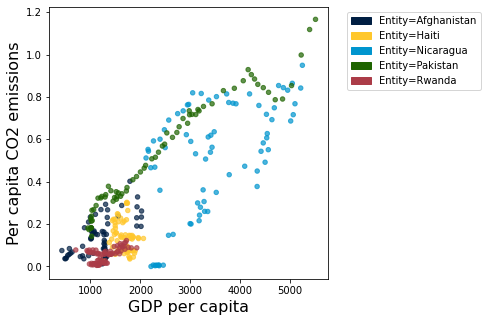

In [13]:
#Low-Income Nations
LIH_array = make_array('Haiti', 'Afghanistan','Rwanda','Pakistan', 'Nicaragua')
LIH_table = co2_table.where('Entity', are.contained_in(LIH_array))
LIH_table = LIH_table.where('GDP per capita', are.above_or_equal_to(0)).where('Per capita CO2 emissions', are.above_or_equal_to(0))
LIH_table.scatter('GDP per capita', 'Per capita CO2 emissions',group='Entity') 

Here, it certainly looks like we see a sort of linear growth: As the GDP per capita grows in LIH-nations, it seems as if per capita CO2 emissions follow steadily. Let's have a look at a set of 5 middle income nations: the BRICS nations.

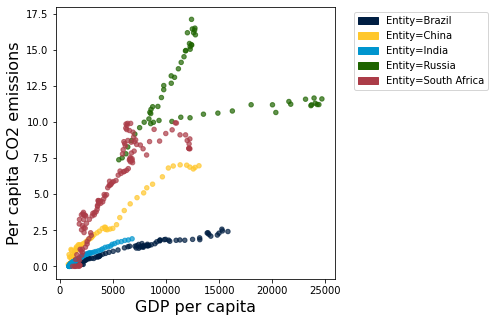

In [14]:
#5 BRICS Nations
BRICS_array = make_array('Brazil','Russia','India','China','South Africa')
BRICS_table = co2_table.where('Entity', are.contained_in(BRICS_array))
BRICS_table = BRICS_table.where('GDP per capita', are.above_or_equal_to(0)).where('Per capita CO2 emissions', are.above_or_equal_to(0))
BRICS_table.scatter('GDP per capita', 'Per capita CO2 emissions',group='Entity')

The BRICS nations seem to have experienced a rapid growth in CO2 emissions per capita in the beginning of their economic growth. Some still continue on a linear path, while others seem to have stagnated: Perhaps they have reached a maximum? What about the country we reside in: the US? I've also included a log-plot to illustrate how our data reacts to percentage changes in each variable.

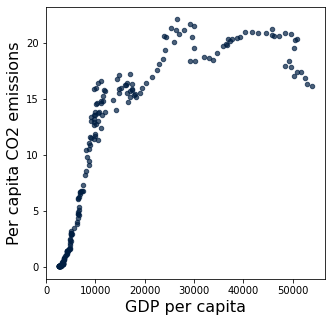

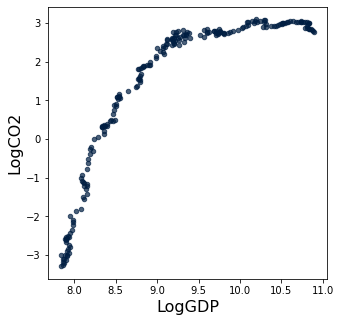

In [23]:
#US Example + LOG
US_table = co2_table.where('Entity', 'United States').where('Year', are.between(1800,2018))
US_table = US_table.with_column('LogGDP', np.log(US_table.column('GDP per capita'))).with_column('LogCO2',np.log(US_table.column('Per capita CO2 emissions')))
US_table.scatter('GDP per capita', 'Per capita CO2 emissions')
US_table.scatter('LogGDP', 'LogCO2')

As I'm Norwegian, I thought it might be cool to see how things are going back home as well:

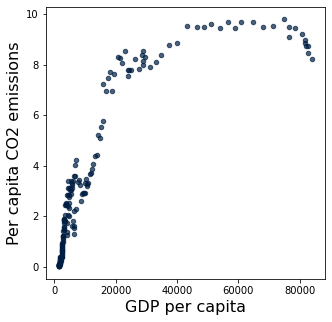

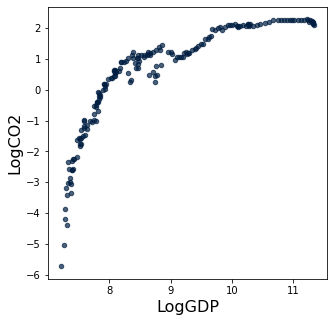

In [25]:
#Norway Example + LOG
NO_table = co2_table.where('Entity', 'Norway').where('Year', are.between(1800,2018))
NO_table = NO_table.with_column('LogGDP', np.log(NO_table.column('GDP per capita'))).with_column('LogCO2',np.log(NO_table.column('Per capita CO2 emissions')))
NO_table.scatter('GDP per capita', 'Per capita CO2 emissions')
NO_table.scatter('LogGDP', 'LogCO2')

Turns out we're ahead of the US in CO2 emissions per capita, but there's still along way to go until our development resembles a full Kuznets curve. However, it certainly looks like something! An almost vertical linear growth in terms of per capita CO2 emissions in the early economic stages stagnated into a period of flunctuations. As of now, it looks like its heading in a downward trend! What about other HIN-nations?

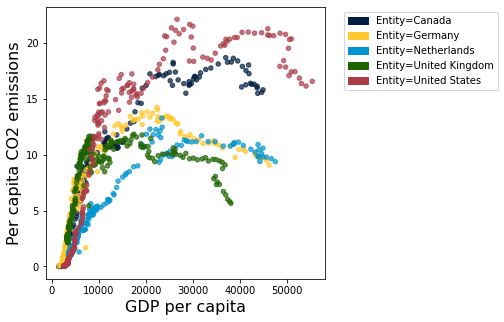

In [26]:
#5 High-Income Nations
HIN_array = make_array('United States', 'Netherlands', 'United Kingdom','Germany','Canada')
HIN_table = co2_table.where('Entity', are.contained_in(HIN_array))
HIN_table = HIN_table.where('GDP per capita', are.above_or_equal_to(0)).where('Per capita CO2 emissions', are.above_or_equal_to(0))
HIN_table.scatter('GDP per capita', 'Per capita CO2 emissions',group='Entity')

As in the US and Norway, these nations have experienced a boom, a stagnation, and now to some extent a downward trend. Let's finally plot all the previously observed nations together:

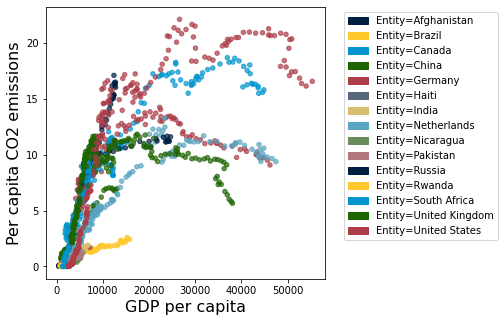

In [27]:
ALL_array = np.append((np.append(LIH_array,BRICS_array)), HIN_array)
ALL_table = co2_table.where('Entity', are.contained_in(ALL_array))
ALL_table = ALL_table.where('GDP per capita', are.above_or_equal_to(0)).where('Per capita CO2 emissions', are.above_or_equal_to(0))
ALL_table.scatter('GDP per capita', 'Per capita CO2 emissions',group='Entity')
#What do we see? Can we spot the Environmental Kuznets Curve?

And there it is: The Environmental Kuznets Curve, right? It seems, at least to some extent, that as nations develop economically, the level of environmental degregation follows a downward-facing U-curve. However, does this leave room for blind optimism for the future? Of course not.

### Criticism of the Environmental Kuznets Curve Hypothesis

Some questions we ought to ask ourselves in the end are:
* Do all types of environmental degregation follow the curve? What if we plot Energy, Land, & Resource usage?
* What we plotted today shows the ratio (italize) between GDP and CO2 per capita, but what about the absolute (italize) numbers of emission?
* What is the true long-term shape of the curve? Could it reshape itself to an "N" as an economy passes a certain treshold?
* What about its applicability on a global scale? Knowing that HIN have a habit of exporting pollution to LIH, what will happen as LIH grow economically?

These are just some questions environmental economists have asked themselves throughout the years since the curve was hypothesized in 1955. Some, including Perman and Stern (2003) conclude that the level of environmental degregation has much more to do with a constant "battle" between scale and time than income alone. As nations scale up (BRICS, for instance) the growth results in higher emissions, while countries with a lower growth (LIH & HIN) seem more influenced by the "time-effect", which results in lower emissions. For more on that theory can be found in the "further recommended readings" below. Others, among Krueger & Grossman, argue that there is "no evidence that environmental quality deteriorates steadily with economic growth." Did'nt we just observe that through our data analysis?

As data scientists now deeply in love with environmental economics, we ought to go out and find these answers!





## Further recommended readings:

Levelized Cost of Carbon Abatement: An Improved Cost-Assessment Methodology for a Net-Zero Emissions World (also the main source of this Jupyter Notebook)

https://www.energypolicy.columbia.edu/sites/default/files/file-uploads/LCCA_CGEP-Report_101620.pdf

Dynamic vs. Static costs are described further in in K.Gillingham & J.H Stock's The Cost of Reducing Greenhouse Gas Emissions (italic) from 2018. - A highly recommended reading out of scope for this class.

https://scholar.harvard.edu/files/stock/files/gillingham_stock_cost_080218_posted.pdf

Goldman Sachs Research: Carbonomics: The Future of Energy in the Age of Climate Change
  
https://www.goldmansachs.com/insights/pages/carbonomics.html

EPA article on the Economics of Climate Change:
https://www.epa.gov/environmental-economics/economics-climate-change

Draw your own curve program:
https://tamc.github.io/macc/

Abatement curve for crops:
https://github.com/aj-sykes92/ggmacc/blob/main/README_files/figure-gfm/full-macc-1.png


Aalborg University's software:
https://github.com/matpri/EPLANoptMAC
